# Supermarket Customers Analyst Data

- Nama  : Irvant Ismail
- Class : Job Connector Data Science

# Latar belakang

Saat ini sudah banyak bermunculan tempat berbelanja seperti Supermarket, Mall, dan swalayan yang banyak menyediakan barang keperluan sehari-hari. Berdasarkan data tahun 2022 jumlah supermarket di Indonesia sebanyak 1.544 retail atau tumbuh 5,18% dari tahun sebelumnya, ini menunjukkan bahwa belanja ditempat tersebut sudah menjadi gaya hidup masyarakat, terutama masyarakat menengah keatas.

Ketatnya persaingan bisnis menuntut perusahaan untuk memahami dan mempelajari berbagai perilaku konsumen, selain itu perusahaan juga sering kali melakukan inovasi atau strategi dalam meningkatkan mutu pelayanan serta meningkatkan profit perusahaan seperti dengan adanya layanan aduan/complain, diskon, campaign, dan memantau traffic website itu sendiri.

Salah satu cara untuk mengetahui dan memberi informasi untuk meningkatkan kebutuhan bisnis sebuah perusahaan dengan melakukan analisa data menggunakan data set Supermarket Customer Data Dictionary.

# Rumusan masalah

Adapun rumusan masalah yang akan menadi topik pembahasan, antara lain :
1. Bagaimana perilaku atau ciri customer yang sering melakukan transaksi/profit paling tinggi
2. Bagaimana campaign yang dijalankan, apakah sudah cukup berhasil?
3. Apa rekomendasi yang dapat diberikan untuk bahan evaluasi perusahaan

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

In [47]:
df = pd.read_csv("SupermarketCustomers_clean.csv")
df.head().style.set_properties(**{"background-color": "#ff8282","color": "black",
                                     "border-color": "black","font-size":"10pt",'width': 200})

,Unnamed: 0,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,TotalMnt,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,TotalAcceptedCmp,Response
0,0,5524,1957,57.000000,Eiderly,Graduation,Single,58138.000000,Lower,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,1617,10,4,7,0,0,0,0,0,0,1,1
1,1,2174,1954,60.000000,Eiderly,Graduation,Single,46344.000000,Lower,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,27,1,2,5,0,0,0,0,0,0,0,0
2,2,4141,1965,49.000000,Eiderly,Graduation,Married,71613.000000,Lower,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,776,2,10,4,0,0,0,0,0,0,0,0
3,3,6182,1984,30.000000,Adult,Graduation,Married,26646.000000,Lower,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,53,0,4,6,0,0,0,0,0,0,0,0
4,4,5324,1981,33.000000,Adult,PhD,Married,58293.000000,Lower,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,422,3,6,5,0,0,0,0,0,0,0,0


In [48]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,2240,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
2,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
3,Age,56,"[57.0, 60.0, 49.0, 30.0, 33.0, 47.0, 43.0, 29.0, 40.0, 64.0, 31.0, 38.0, 55.0, 62.0, 27.0, 68.0, 34.0, 65.0, 32.0, 35.0, 63.0, 45.0, 28.0, 25.0, 51.0, 44.0, 41.0, 71.0, 39.0, 18.0, 46.0, 50.0, 37.0, 36.0, 59.0, 48.0, 26.0, 66.0, 56.0, 42.0, 54.0, 69.0, 23.0, 52.0, 61.0, 53.0, 58.0, 22.0, 24.0, 67.0, 21.0, 20.0, 73.0, 70.0, 19.0, 74.0]"
4,AgeGroup,5,"[Eiderly, Adult, Old, Teenage, Children]"
5,Education,4,"[Graduation, PhD, Master, Basic]"
6,Marital_Status,4,"[Single, Married, Divorced, Widow]"
7,Income,1973,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 44421.0, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 55257.5, 79941.0, 41728.0, 57811.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 36425.5, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 44239.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, ...]"
8,Income_category,1,[Lower]
9,Kidhome,3,"[0, 1, 2]"


# Produk penjualan Tertinggi

Market Product and Customer Segmentation based on amount spend of product

In [49]:
avg = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']].mean(axis=0)

fig = px.pie(values=avg.values, names=avg.index,  
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Average Amount Spent on Product Categories', title_x=0.5,
                  legend=dict(
                      yanchor="top",
                      y=0.99,
                      xanchor="right",
                      x=0.99
                  ))

Berdasarkan pie chart diatas dapat dilihat bahwa:
1. diposisi pertama ada produk wine dengann 50,2%
2. diurutan ke dua ada produk daging dengan 27,6%
3. diurutan ke tiga ada produk gold dengan 7,27%
4. diurutan ke empat ada ikan dengan 6,19%
5. diurutan ke lima ada produk manis dengan 4,47%
6. diurutan terakhir ada buah-buahan dengan 4,34%

Dapat disimpulkan data ini merupakan supermarket yang berada diluar negeri, karena kita ketahui bahwa budaya luar bahwa banyak orang yang suka meminum wine, dan untuk produk daging ada diurutan ke 2 karena sebagai bahan makanan sehari-hari

# Korelasi Income dengan TotalMnt terhadap setiap data Kategorikal

Text(0, 0.5, 'Income per Year')

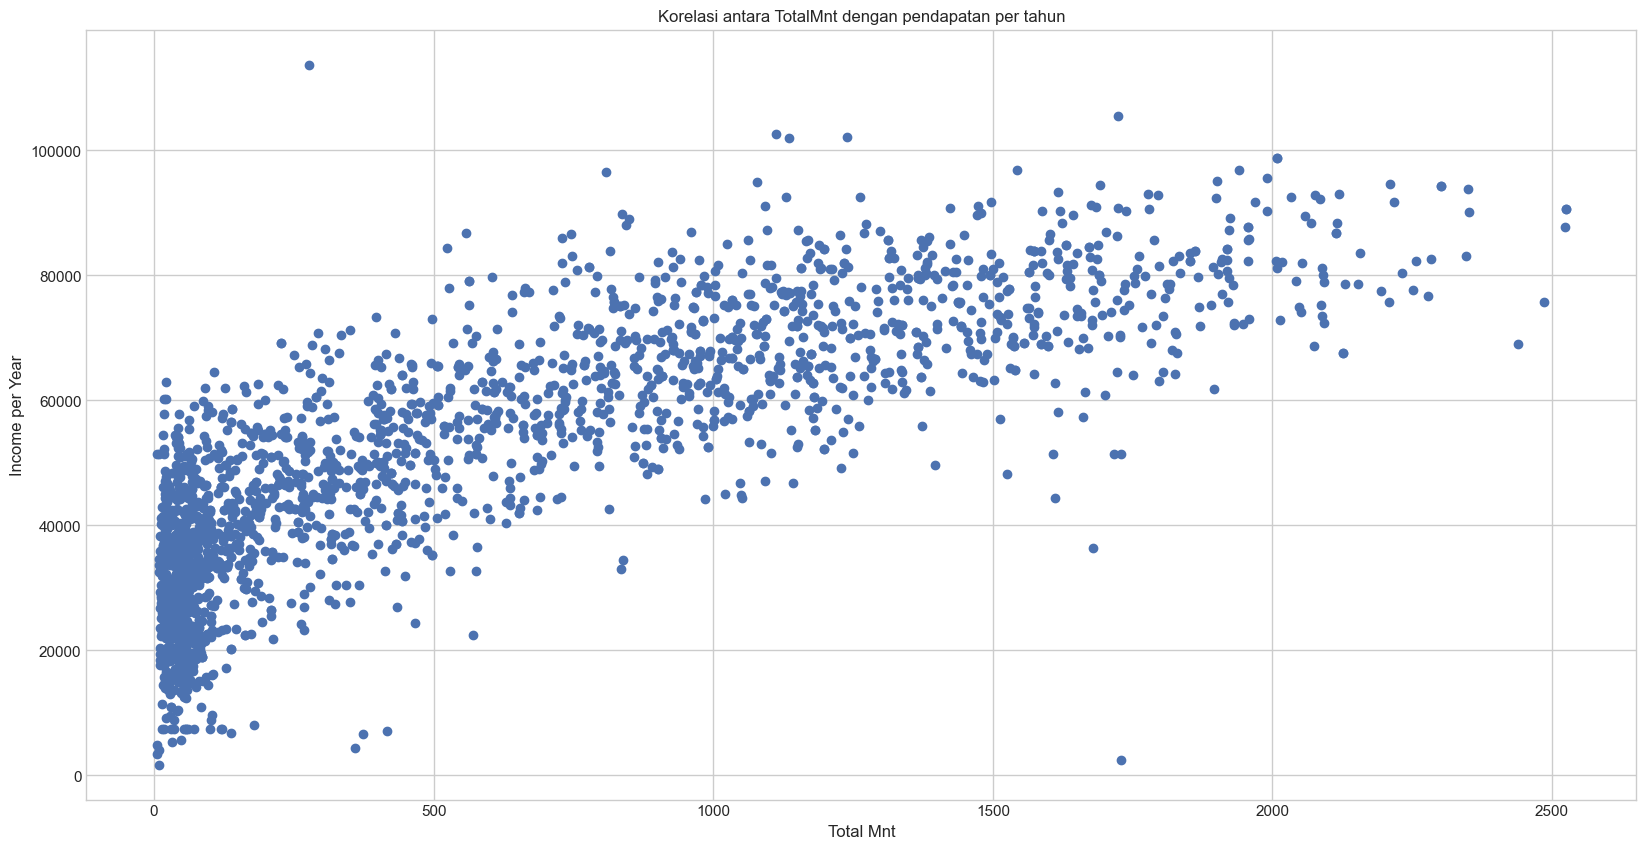

In [50]:
plt.scatter(x= df.TotalMnt, y = df.Income)
plt.title("Korelasi antara TotalMnt dengan pendapatan per tahun")
plt.xlabel("Total Mnt")
plt.ylabel("Income per Year")

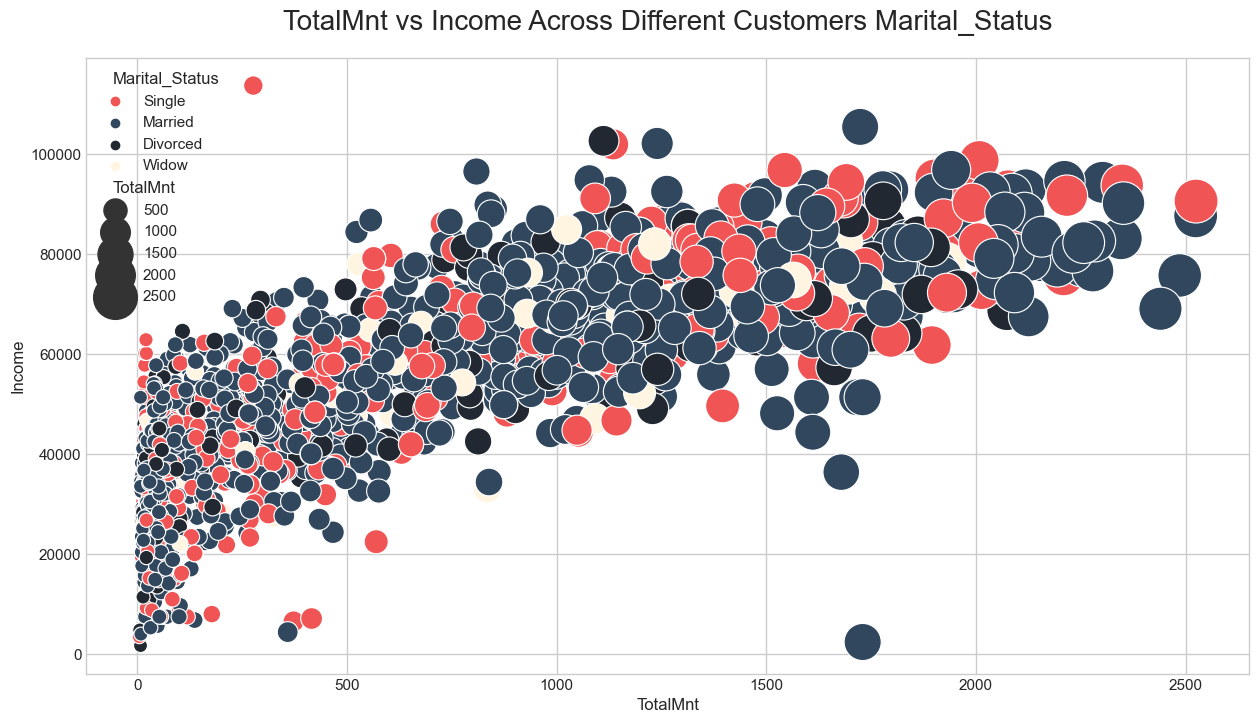

In [51]:
# plt.scatter(x= df.TotalMnt, y = df.Income)
# plt.title("Korelasi antara TotalMnt dengan pendapatan per tahun")
# plt.xlabel("Total Mnt")
# plt.ylabel("Income per Year")
# Mengambil beberapa kolom
data_scatter = df[['TotalMnt', 'Income', 'Marital_Status']]

# Visualisasi Scatterplot
plt.figure(figsize=[15,8])
# Profit pada sumbu Y, and Sales pada sumbu  X. Hue will classify the dots according to Segment.
# Ukuran titik-titik sesuai dengan volume "Penjualan".
sb.scatterplot(x=data_scatter['TotalMnt'], y=data_scatter['Income'], hue=data_scatter['Marital_Status'],palette=['#F05454','#30475E','#222831', '#FFF5E0'], size=data_scatter["TotalMnt"], sizes=(100,1000), legend='auto') 
plt.title("TotalMnt vs Income Across Different Customers Marital_Status", size=20, pad=20)
plt.show()

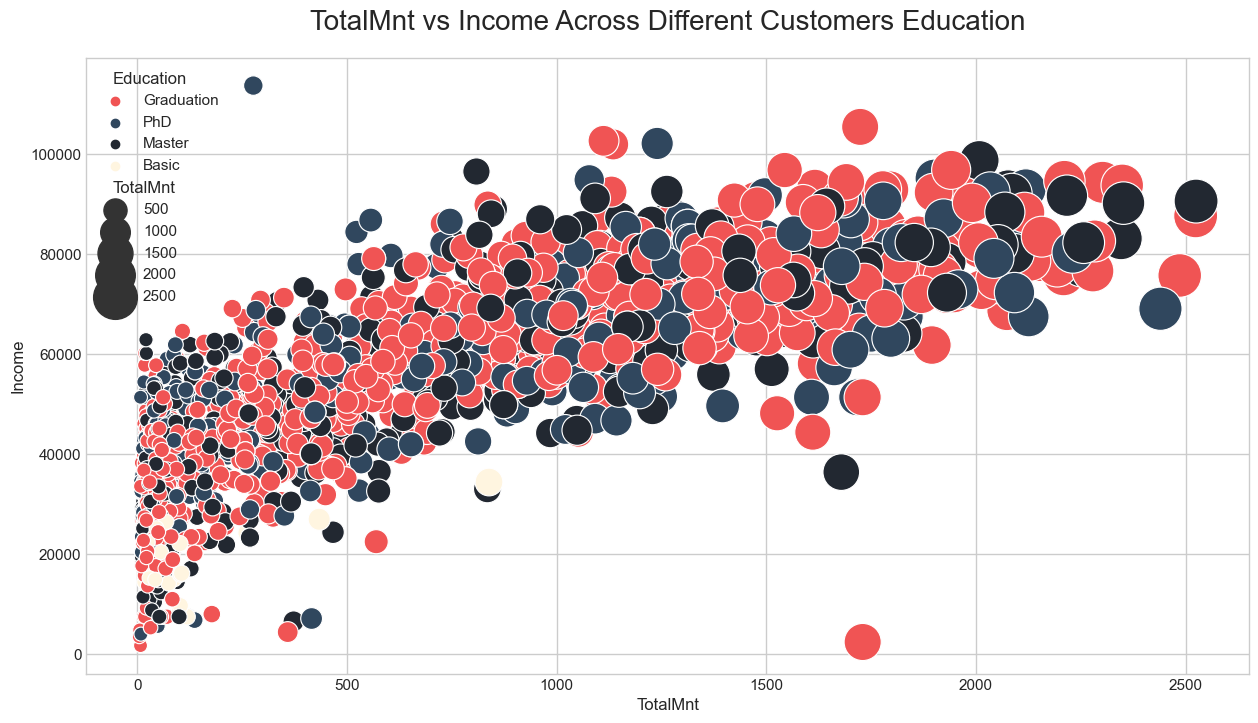

In [52]:
data_scatter = df[['TotalMnt', 'Income', 'Education']]

# Visualisasi Scatterplot
plt.figure(figsize=[15,8])
# Profit pada sumbu Y, and Sales pada sumbu  X. Hue will classify the dots according to Segment.
# Ukuran titik-titik sesuai dengan volume "Penjualan".
sb.scatterplot(x=data_scatter['TotalMnt'], y=data_scatter['Income'], hue=data_scatter['Education'],palette=['#F05454','#30475E','#222831', '#FFF5E0'], size=data_scatter["TotalMnt"], sizes=(100,1000), legend='auto') 
plt.title("TotalMnt vs Income Across Different Customers Education", size=20, pad=20)
plt.show()

C:\Users\mahfu\AppData\Local\Temp\ipykernel_24596\1638535842.py:7: UserWarning:

The palette list has more values (4) than needed (3), which may not be intended.



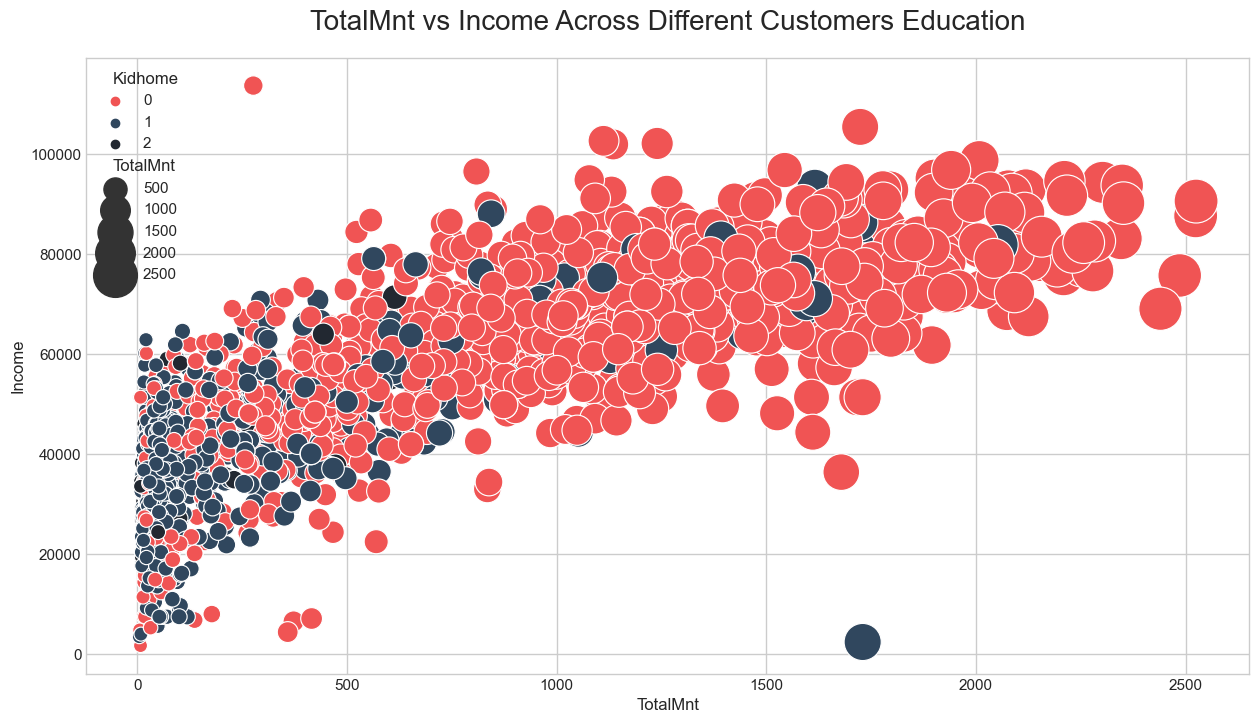

In [53]:
data_scatter = df[['TotalMnt', 'Income', 'Kidhome']]

# Visualisasi Scatterplot
plt.figure(figsize=[15,8])
# Profit pada sumbu Y, and Sales pada sumbu  X. Hue will classify the dots according to Segment.
# Ukuran titik-titik sesuai dengan volume "Penjualan".
sb.scatterplot(x=data_scatter['TotalMnt'], y=data_scatter['Income'], hue=data_scatter['Kidhome'],palette=['#F05454','#30475E','#222831', '#FFF5E0'], size=data_scatter["TotalMnt"], sizes=(100,1000), legend='auto') 
plt.title("TotalMnt vs Income Across Different Customers Education", size=20, pad=20)
plt.show()

C:\Users\mahfu\AppData\Local\Temp\ipykernel_24596\3419253338.py:7: UserWarning:

The palette list has more values (4) than needed (3), which may not be intended.



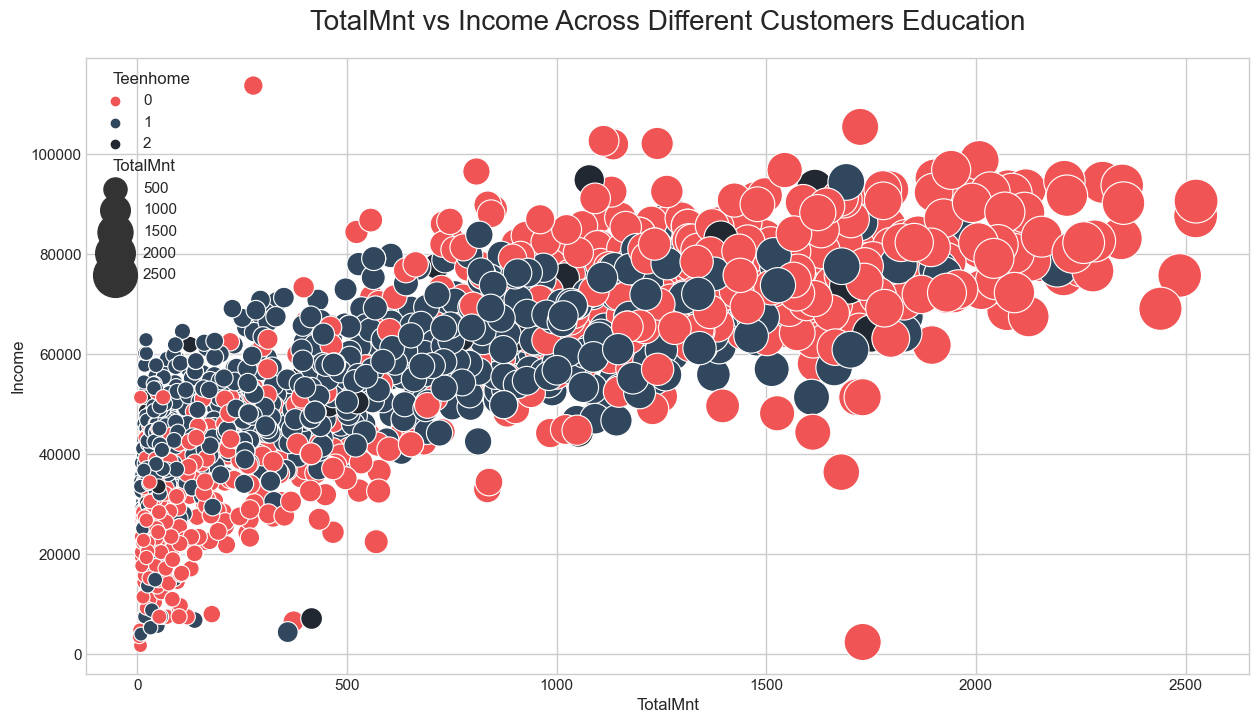

In [54]:
data_scatter = df[['TotalMnt', 'Income', 'Teenhome']]

# Visualisasi Scatterplot
plt.figure(figsize=[15,8])
# Profit pada sumbu Y, and Sales pada sumbu  X. Hue will classify the dots according to Segment.
# Ukuran titik-titik sesuai dengan volume "Penjualan".
sb.scatterplot(x=data_scatter['TotalMnt'], y=data_scatter['Income'], hue=data_scatter['Teenhome'],palette=['#F05454','#30475E','#222831', '#FFF5E0'], size=data_scatter["TotalMnt"], sizes=(100,1000), legend='auto') 
plt.title("TotalMnt vs Income Across Different Customers Education", size=20, pad=20)
plt.show()

Dari pesebaran data scatter plot hubungan antara Income dengan TotalMnt dibandingkan dengan setiap data kategorikal, kita dapat menyimpulkan bahwa rata-rata customer yang melakukan transaksi terbanyak adalah:
1. Customer dengan income tertinggi
2. Customer dengan Marital_Status = Married
3. Customer dengan Pendidikan = Graduation
4. Customer dengan Kidhome = 0
5. Customer dengan TeenHome = 0 \
Artinya customer dengan income tertinggi dan sudah menikah dengan pendidikan graduation dan belum memiliki anak sering melakukan transaksi, hal ini cukup masuk akal karena dengan pendapatan mereka berdua dan belum memiliki tanggungan hidup lebih, mereka akan cenderung melakukan transaksi lebih banyak.

# Analisis Campaign & Uji Statistika

In [55]:
CmpReceive = df.TotalAcceptedCmp.value_counts()
CmpReceive

0    1631
1     370
2     142
3      51
4      36
5      10
Name: TotalAcceptedCmp, dtype: int64

The number customer that receive and accept the campaign is 599
The number customer that not receive and accept the campaign is 1631


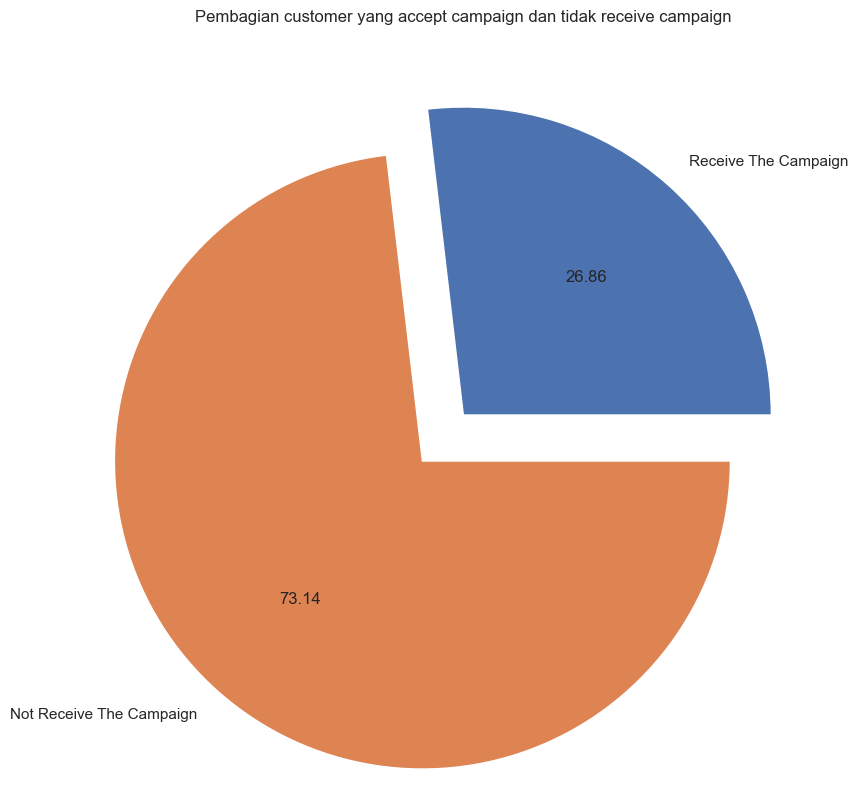

In [56]:
# Count and check the customer who receive the campaign and not receive the campaign.

Accept = CmpReceive[[1,2,3,4]].sum()
NotAccept =  CmpReceive[[0]].sum()


plt.pie([Accept, NotAccept], labels = ['Receive The Campaign', 'Not Receive The Campaign'], autopct = '%.2f',
    explode = [0, 0.2])

plt.title("Pembagian customer yang accept campaign dan tidak receive campaign")

print (f'The number customer that receive and accept the campaign is {Accept}')
print (f'The number customer that not receive and accept the campaign is {NotAccept}')

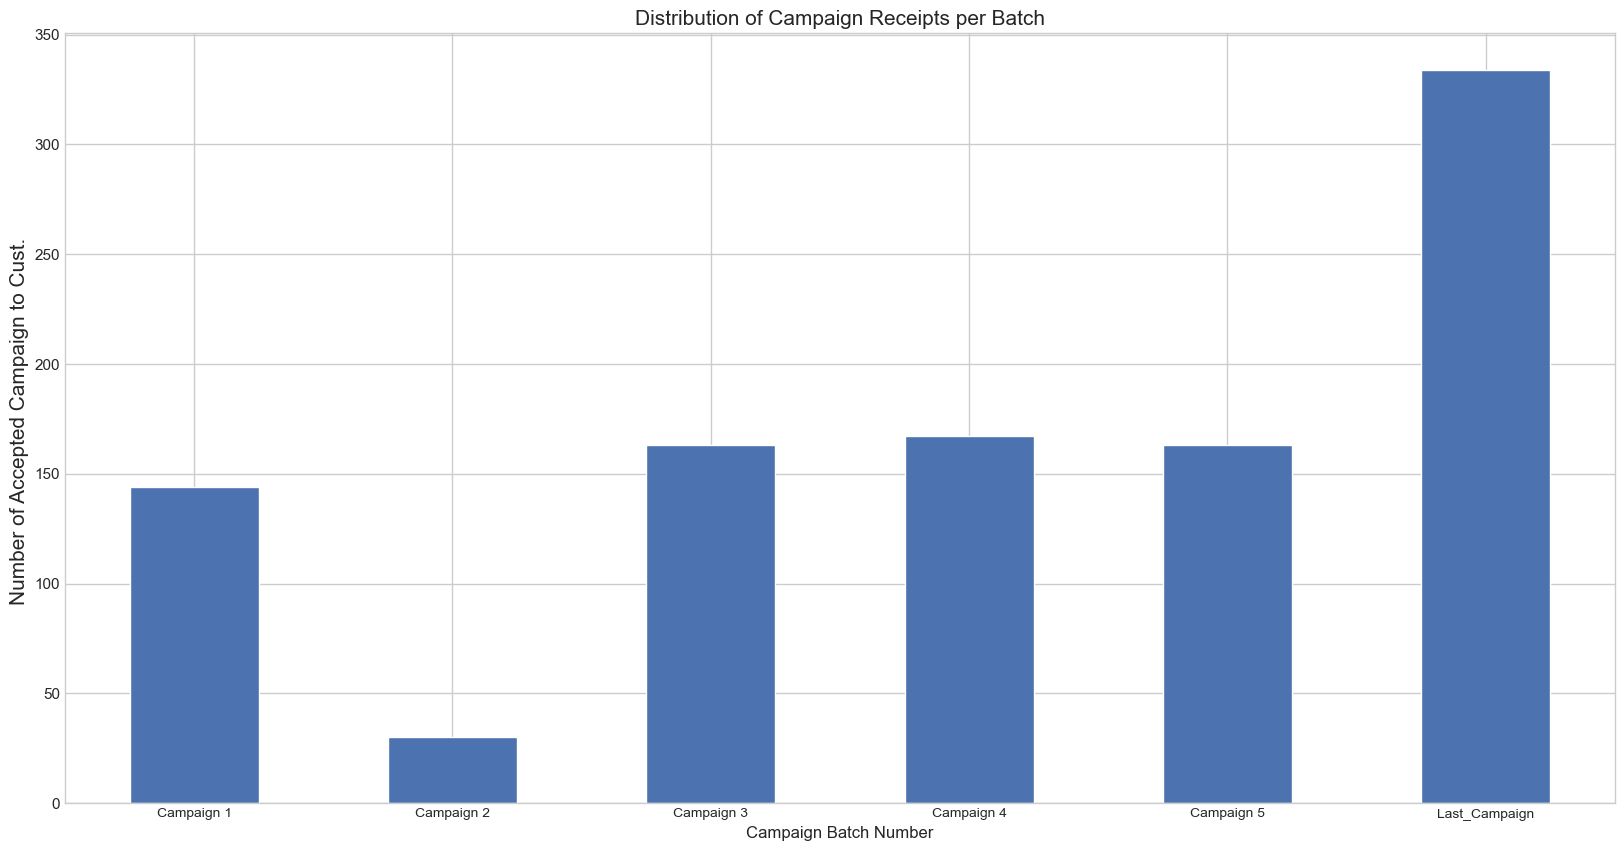

In [57]:
# campaign columns
campaignCols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# plot data
df[campaignCols].sum().plot(kind='bar')

# title
plt.title("Distribution of Campaign Receipts per Batch", fontsize=15)

# set x and y label
plt.ylabel("Number of Accepted Campaign to Cust. ", fontsize=15)
plt.xlabel("Campaign Batch Number", fontsize=12)
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Last_Campaign'], fontsize=10)

# rotate x label
plt.tick_params(axis='x', labelrotation=360)

aCmp = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'Response']].sum(axis=0)
names = ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5', 'Last_Campaign']

fig = px.pie(values=aCmp.values, names=names, hole=0.6,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Percentage of Accepted Offers Per Campaign', title_x=0.5)

In [58]:
aCmp = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'Response']].sum(axis=0)
names = ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5', 'Last_Campaign']

fig = px.pie(values=aCmp.values, names=names, hole=0.6,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Percentage of Accepted Offers Per Campaign', title_x=0.5)

Median: 396.0


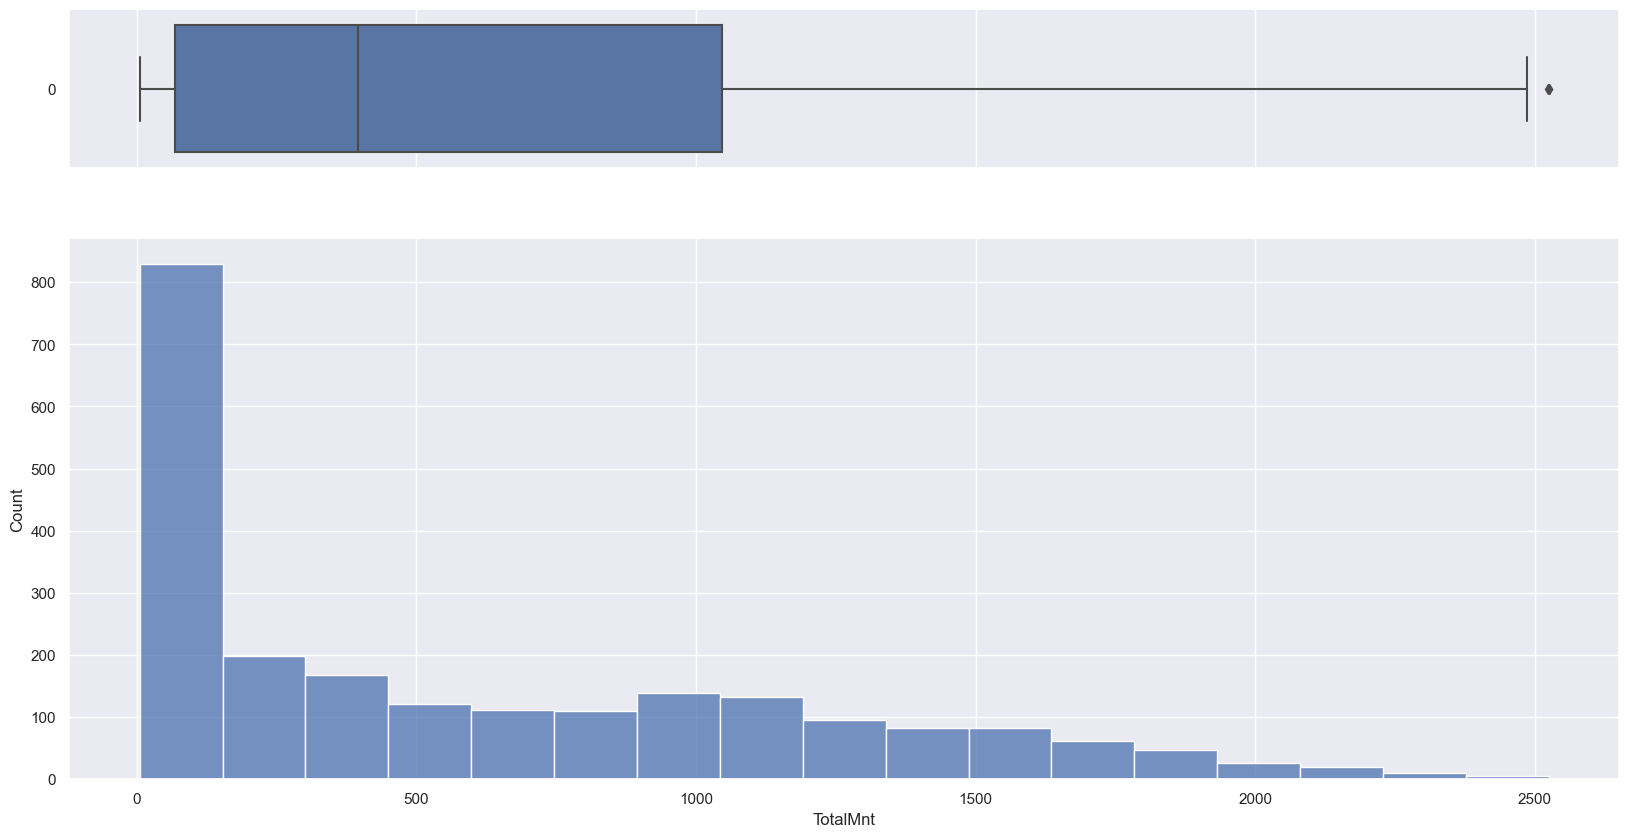

C:\Users\mahfu\AppData\Local\Temp\ipykernel_24596\1724508504.py:19: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [59]:
# Check The Normal Distribution of Total Amount 

# Price variable 
print(f'Median: {df.TotalMnt.median()}')
sb.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .85)})
 
# assigning a graph to each ax
sb.boxplot(df["TotalMnt"], ax=ax_box, orient='h')
sb.histplot(data=df, x="TotalMnt", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

# Graphical test for known the distribution total amount
plt.style.use('seaborn-whitegrid')


### Hypotesis Testing Campaign with the total amount

Berdasarkan Histogram, Total Amount tidak berdistribusi normal atau lebih ke arah skewed right dengan p value adalah 0 \
sehingga data tersebut cocok diuji dengan uji statistika non parametrik, dan saya akan menggunakan uji Man whitneey one tail

Hypotesis : 
- H0 : Total Mnt yang customer keluarkan dengan campaign = Total Mnt yang customer keluarkan dengan campaign 
- H1 : Total Mnt yang customer keluarkan dengan campaign > Total Mnt yang customer keluarkan  tidak dengan campaign 

In [60]:
from scipy.stats import mannwhitneyu

In [61]:
# membuat kolom campaign accept dari kolom total acceptedcmp

df.insert(30, column="campaignAccept", value=df['TotalAcceptedCmp'])

In [62]:
# merubah nilai kedalam kategorikal
replace_values_cmp = {
                0 : 'Not Accept',
                1 : 'Accept',
                2 : 'Accept',
                3 : 'Accept',
                4 : 'Accept',
                5 : 'Accept',
}

df['campaignAccept'].replace(replace_values_cmp, inplace=True)

In [63]:
# merubah nilai kedalam kategorikal
replace_values_cmp2 = {
                'Accept' : '1',
           
}

df['campaignAccept'].replace(replace_values_cmp, inplace=True)

In [64]:
df['campaignAccept'].value_counts()

Not Accept    1631
Accept         609
Name: campaignAccept, dtype: int64

In [65]:
_, pvalue = mannwhitneyu(
    df[df['campaignAccept']=='Accept']['TotalMnt'],
    df[df['campaignAccept']=='Not Accept']['TotalMnt'],
    alternative = 'less'
)

pvalue = pvalue/2
rounded = round(pvalue, 33)

print(f"p-value: {rounded}")
# print("p-value:",pvalue )

p-value: 0.5


In [66]:
_, pvalue = mannwhitneyu(
    df[df['campaignAccept']=='Accept']['TotalMnt'],
    df[df['campaignAccept']=='Not Accept']['TotalMnt'],
)

print(f"p-value: {pvalue}")

p-value: 2.2661258281053708e-68


In [67]:
TotalMntMed = 396.00

# discretization Total Amout by median value 
def TotalAmount_disc (df):
    if df.TotalMnt < TotalMntMed:
        return "Low to Mid"
    else:
        return "Mid to High"
    
df['TotalAmount_disc'] = df.apply(TotalAmount_disc, axis=1)


In [68]:
# number of spent category
Pivot_Campaign = df[['campaignAccept','TotalAmount_disc']].pivot_table(
    index= 'campaignAccept',
    columns= 'TotalAmount_disc',
    values= 'TotalAmount_disc',
    aggfunc= len
)

Pivot_Campaign

TotalAmount_disc,Low to Mid,Mid to High
campaignAccept,,
Accept,161,448
Not Accept,957,674


In [69]:
Pivot_Campaign.loc['Accept','Mid to High']

448

In [70]:
# # number of Accept the campaign and Mid to High amount
# nHighAcp = Pivot_Campaign.loc['Accept','Mid to High']

# # number of Not Accept the campaign and Mid to High amount
# nHighNotAcp = Pivot_Campaign.loc['Not Accept','Mid to High']

# # number of accept customers
# n_acp = Pivot_Campaign.sum(axis=1)['Accept']

# # number of never accept customers
# n_notacp = Pivot_Campaign.sum(axis=1)['Not Accept']

# from statsmodels.stats.proportion import proportions_ztest

# stat, pvalue = proportions_ztest(
#     count = [nHighAcp, nHighNotAcp],   
#     nobs = [n_acp, n_notacp],
#     alternative ='larger'
# )

# pvalue/2

In [71]:
_, pvalue = mannwhitneyu(
    df[df['campaignAccept']=='Accept']['TotalMnt'],
    df[df['campaignAccept']=='Not Accept']['TotalMnt'],
    alternative ='two-sided'
)

print(f"p-value: {pvalue/2}")

p-value: 1.1330629140526854e-68


### Kesimpulan hypotesis testing campaign terhadap TotalMnt

Pvalue yang dihasilkan adalah 1.130629140526854e-68 atau <= 0.05. sehingga dapat disimpulkan kita tidak punya bukti kuat untuk menerima H0 \
Artinya proporsi TotalMnt dengan campaign akan lebih besar dibandingkan proporsi TotalMnt tanpa campaign, dan jarak kedua nya sangatlah jauh.

### Rata-rata TotalMnt Terhadap setiap Campaign yang berjalan

<BarContainer object of 6 artists>

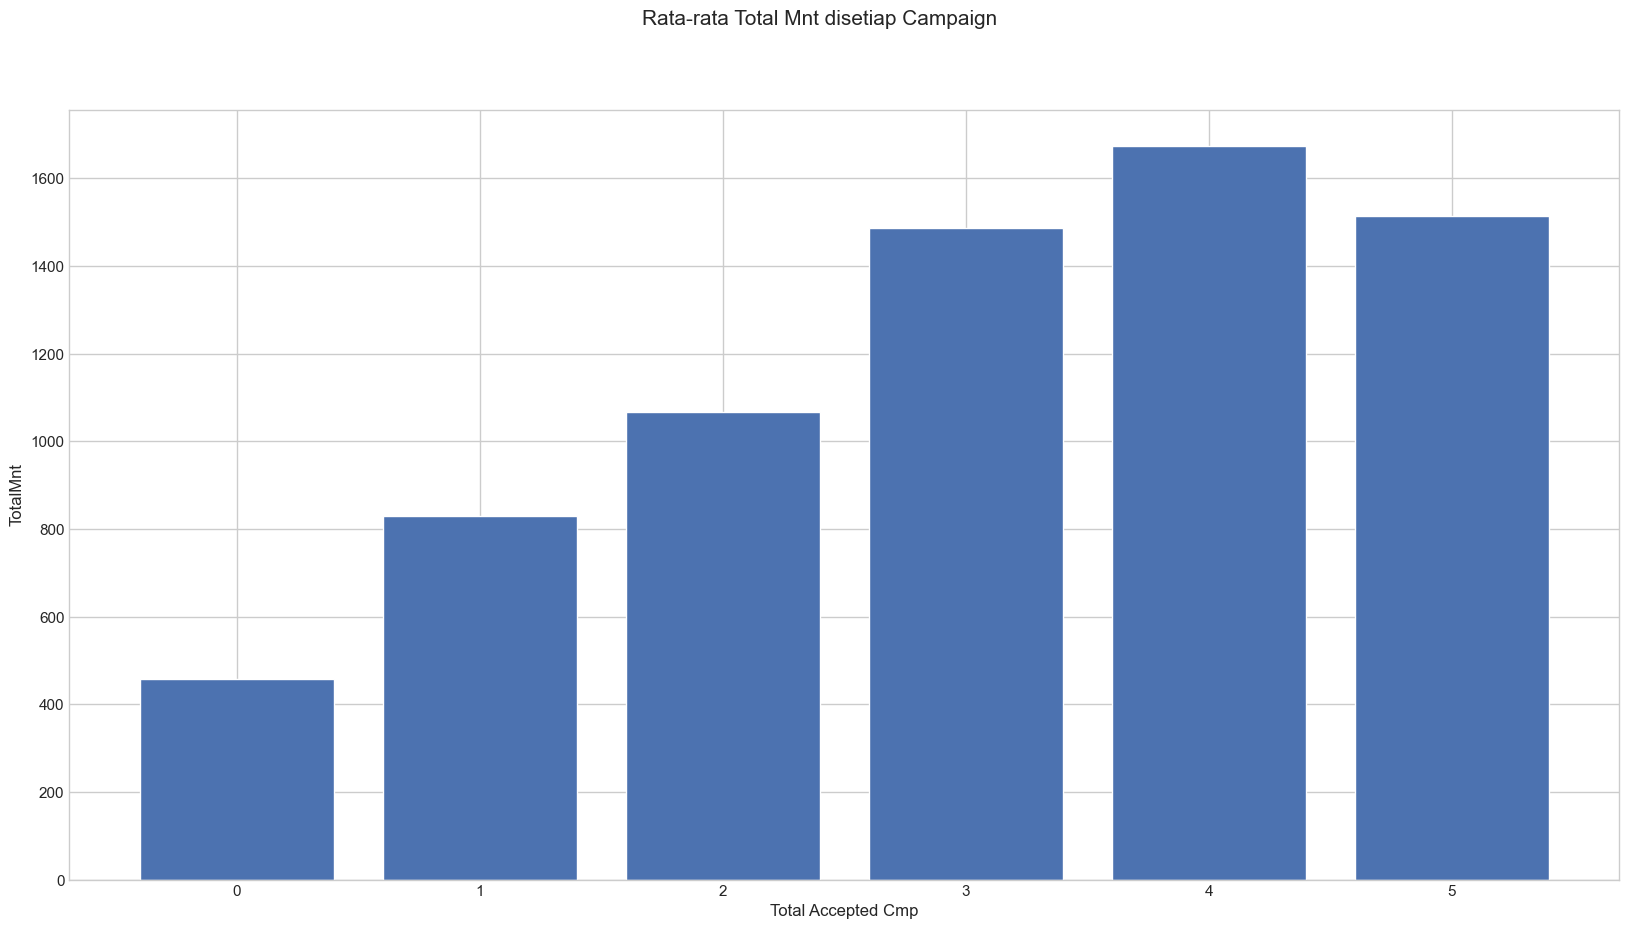

In [72]:
data_graf = df[['TotalAcceptedCmp', 'TotalMnt']]

data_graf = data_graf.groupby('TotalAcceptedCmp').mean().sort_values(by ='TotalMnt', ascending = False)
plt.figure(figsize=[20,10])

#visualisasi menggunakan barchart
plt.suptitle("Rata-rata Total Mnt disetiap Campaign", size=15)
plt.xlabel("Total Accepted Cmp")
plt.ylabel("TotalMnt")
# Plotting the BarChart
plt.bar(x=data_graf.index, height='TotalMnt', data=data_graf)

In [73]:
columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
columns_new = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']

total = df[columns].sum()
total.index = columns_new
total = total.reset_index(name='total')

fig = px.treemap(total, path=['index'],values='total',
                 color_discrete_sequence=px.colors.sequential.RdBu)

fig.data[0].textinfo = 'label+text+value'
fig.update_layout(margin = dict(t=25, l=25, r=25, b=25),
                  title_text='The Number of Purchases for Each Market Place',
                  title_x = 0.5,
                  title_y = 0.96)
fig.update_traces(textposition='middle center')
fig.layout.hovermode = False

fig.show()

In [74]:
columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
columns_new = ['Web Purchases', 'Catalog Purchases', 'Store Purchases', 'NumDealsPurchases']

total = df[columns].sum()
total.index = columns_new
total = total.reset_index(name='total')

fig = px.treemap(total, path=['index'],values='total',
                 color_discrete_sequence=px.colors.sequential.RdBu)

fig.data[0].textinfo = 'label+text+value'
fig.update_layout(margin = dict(t=25, l=25, r=25, b=25),
                  title_text='The Number of Purchases for Each Market Place',
                  title_x = 0.5,
                  title_y = 0.96)
fig.update_traces(textposition='middle center')
fig.layout.hovermode = False

fig.show()

In [75]:
df['NumDealsPurchases'].value_counts()

1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
10      5
11      5
12      4
13      3
Name: NumDealsPurchases, dtype: int64

In [76]:
coba = df[['Marital_Status','Income','Education','Response','TotalAcceptedCmp','TotalMnt','NumDealsPurchases','NumWebPurchases']]
coba

,Marital_Status,Income,Education,Response,TotalAcceptedCmp,TotalMnt,NumDealsPurchases,NumWebPurchases
0,Single,58138.0,Graduation,1,1,1617,3,8
1,Single,46344.0,Graduation,0,0,27,2,1
2,Married,71613.0,Graduation,0,0,776,1,8
3,Married,26646.0,Graduation,0,0,53,2,2
4,Married,58293.0,PhD,0,0,422,5,5
...,...,...,...,...,...,...,...,...
2235,Married,61223.0,Graduation,0,0,1341,2,9
2236,Married,64014.0,PhD,0,1,444,7,8
2237,Divorced,56981.0,Graduation,0,1,1241,1,2
2238,Married,69245.0,Master,0,0,843,2,6


In [77]:
df['NumWebPurchases'].value_counts()

2     373
1     354
3     336
4     280
5     220
6     205
7     155
8     102
9      75
0      49
11     44
10     43
27      2
23      1
25      1
Name: NumWebPurchases, dtype: int64

<BarContainer object of 6 artists>

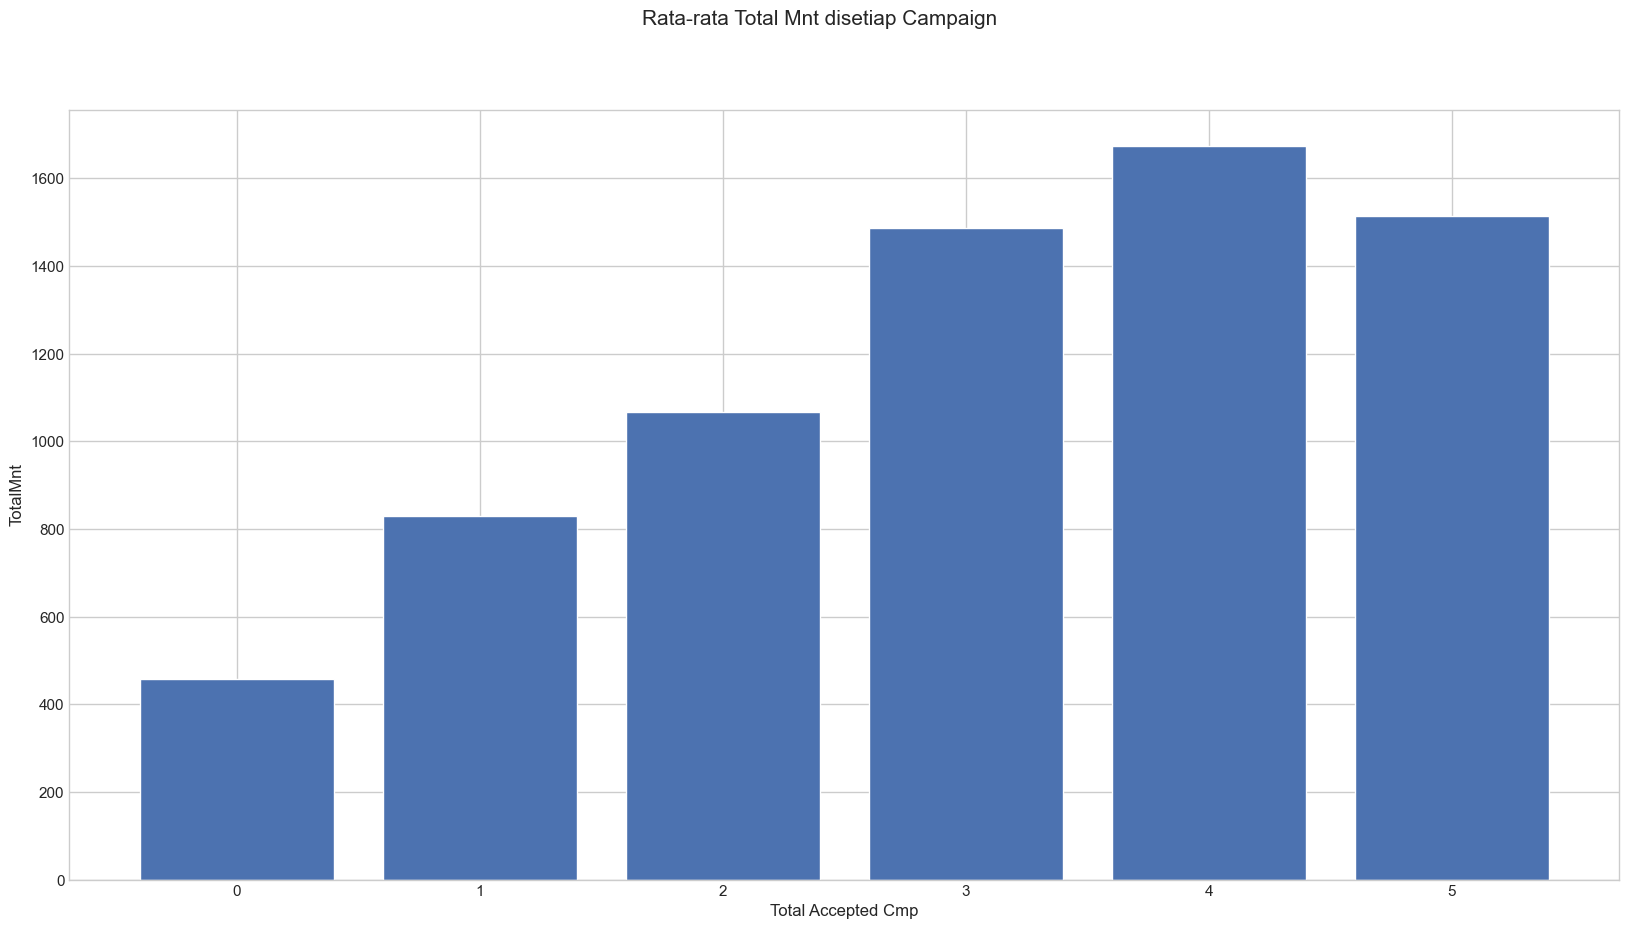

In [78]:
data_graf = df[['TotalAcceptedCmp', 'TotalMnt']]

data_graf = data_graf.groupby('TotalAcceptedCmp').mean().sort_values(by ='TotalMnt', ascending = False)
plt.figure(figsize=[20,10])

#visualisasi menggunakan barchart
plt.suptitle("Rata-rata Total Mnt disetiap Campaign", size=15)
plt.xlabel("Total Accepted Cmp")
plt.ylabel("TotalMnt")
# Plotting the BarChart
plt.bar(x=data_graf.index, height='TotalMnt', data=data_graf)

In [79]:
df['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

# Tren Customer Join Market

In [80]:
df

,Unnamed: 0,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,Income_category,Kidhome,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,campaignAccept,Complain,TotalAcceptedCmp,Response,TotalAmount_disc
0,0,5524,1957,57.0,Eiderly,Graduation,Single,58138.0,Lower,0,...,0,0,0,0,0,Accept,0,1,1,Mid to High
1,1,2174,1954,60.0,Eiderly,Graduation,Single,46344.0,Lower,1,...,0,0,0,0,0,Not Accept,0,0,0,Low to Mid
2,2,4141,1965,49.0,Eiderly,Graduation,Married,71613.0,Lower,0,...,0,0,0,0,0,Not Accept,0,0,0,Mid to High
3,3,6182,1984,30.0,Adult,Graduation,Married,26646.0,Lower,1,...,0,0,0,0,0,Not Accept,0,0,0,Low to Mid
4,4,5324,1981,33.0,Adult,PhD,Married,58293.0,Lower,1,...,0,0,0,0,0,Not Accept,0,0,0,Mid to High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,47.0,Eiderly,Graduation,Married,61223.0,Lower,0,...,0,0,0,0,0,Not Accept,0,0,0,Mid to High
2236,2236,4001,1946,68.0,Old,PhD,Married,64014.0,Lower,2,...,0,0,0,1,0,Accept,0,1,0,Mid to High
2237,2237,7270,1981,33.0,Adult,Graduation,Divorced,56981.0,Lower,0,...,0,1,0,0,0,Accept,0,1,0,Mid to High
2238,2238,8235,1956,58.0,Eiderly,Master,Married,69245.0,Lower,0,...,0,0,0,0,0,Not Accept,0,0,0,Mid to High


In [81]:
coba = df[['ID','Age','Education','Marital_Status','Dt_Customer']]
coba

,ID,Age,Education,Marital_Status,Dt_Customer
0,5524,57.0,Graduation,Single,2012-09-04
1,2174,60.0,Graduation,Single,2014-03-08
2,4141,49.0,Graduation,Married,2013-08-21
3,6182,30.0,Graduation,Married,2014-02-10
4,5324,33.0,PhD,Married,2014-01-19
...,...,...,...,...,...
2235,10870,47.0,Graduation,Married,2013-06-13
2236,4001,68.0,PhD,Married,2014-06-10
2237,7270,33.0,Graduation,Divorced,2014-01-25
2238,8235,58.0,Master,Married,2014-01-24


In [82]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

In [83]:
df['month'] = df['Dt_Customer'].dt.month
df['year'] = df['Dt_Customer'].dt.year
df['day'] = df['Dt_Customer'].dt.day

In [84]:
df

,Unnamed: 0,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,Income_category,Kidhome,...,AcceptedCmp1,AcceptedCmp2,campaignAccept,Complain,TotalAcceptedCmp,Response,TotalAmount_disc,month,year,day
0,0,5524,1957,57.0,Eiderly,Graduation,Single,58138.0,Lower,0,...,0,0,Accept,0,1,1,Mid to High,9,2012,4
1,1,2174,1954,60.0,Eiderly,Graduation,Single,46344.0,Lower,1,...,0,0,Not Accept,0,0,0,Low to Mid,3,2014,8
2,2,4141,1965,49.0,Eiderly,Graduation,Married,71613.0,Lower,0,...,0,0,Not Accept,0,0,0,Mid to High,8,2013,21
3,3,6182,1984,30.0,Adult,Graduation,Married,26646.0,Lower,1,...,0,0,Not Accept,0,0,0,Low to Mid,2,2014,10
4,4,5324,1981,33.0,Adult,PhD,Married,58293.0,Lower,1,...,0,0,Not Accept,0,0,0,Mid to High,1,2014,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,47.0,Eiderly,Graduation,Married,61223.0,Lower,0,...,0,0,Not Accept,0,0,0,Mid to High,6,2013,13
2236,2236,4001,1946,68.0,Old,PhD,Married,64014.0,Lower,2,...,1,0,Accept,0,1,0,Mid to High,6,2014,10
2237,2237,7270,1981,33.0,Adult,Graduation,Divorced,56981.0,Lower,0,...,0,0,Accept,0,1,0,Mid to High,1,2014,25
2238,2238,8235,1956,58.0,Eiderly,Master,Married,69245.0,Lower,0,...,0,0,Not Accept,0,0,0,Mid to High,1,2014,24


In [85]:
df['month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: month
Non-Null Count  Dtype
--------------  -----
2240 non-null   int64
dtypes: int64(1)
memory usage: 17.6 KB


In [86]:
df['month'] = df['month'].astype(str)

In [87]:
# replace several values
change_value = {
                '1' : 'Januari',
                '2' : 'Februari',
                '3' : 'Maret',
                '4' : 'April',
                '5' : 'Mei',
                '6' : 'Juni',
                '7' : 'Juli',
                '8' : 'Agustus',
                '9' : 'September',
                '10' : 'Oktober',
                '11' : 'November',
                '12' : 'Desember'
}

df['month'].replace(change_value, inplace=True)

In [88]:
df['month'].value_counts()

Agustus      222
Mei          216
Oktober      212
Maret        211
Januari      197
September    193
November     187
April        182
Februari     178
Desember     175
Juni         166
Juli         101
Name: month, dtype: int64

In [89]:
new_data_line = {"month" : ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'],
"Banyak" : [197, 178, 211, 182, 216, 166, 101, 222, 193, 212, 187, 175]
}

line_chart = pd.DataFrame(new_data_line)
line_chart.head()

,month,Banyak
0,Januari,197
1,Februari,178
2,Maret,211
3,April,182
4,Mei,216


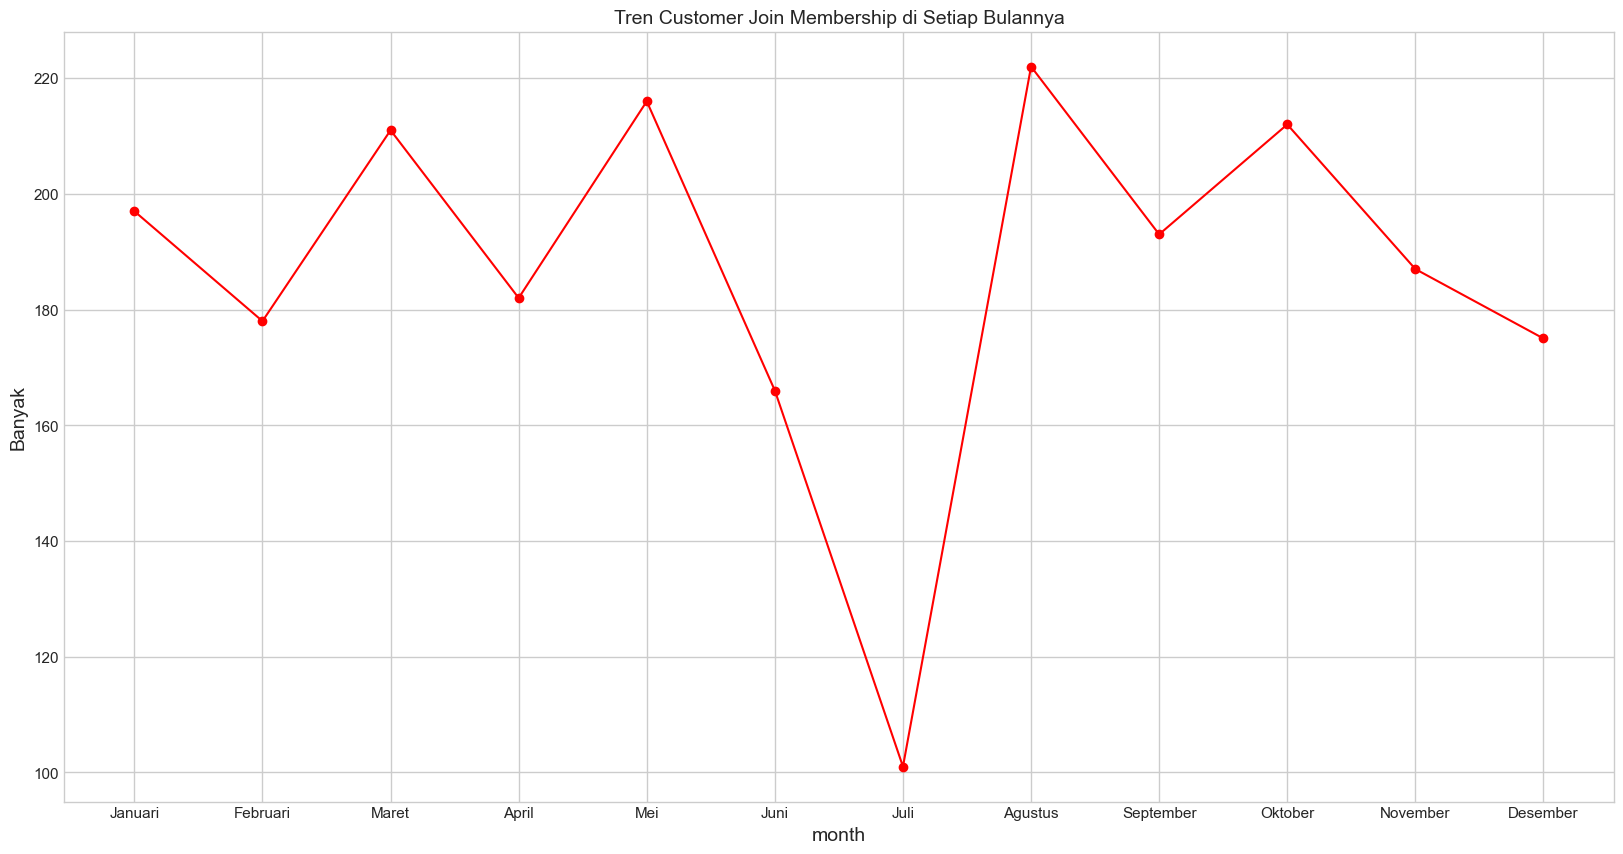

In [90]:
plt.plot(line_chart['month'], line_chart['Banyak'], color='red', marker='o')
plt.title('Tren Customer Join Membership di Setiap Bulannya', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('Banyak', fontsize=14)
plt.grid(True)
plt.show()

# Evaluasi Customer Complained

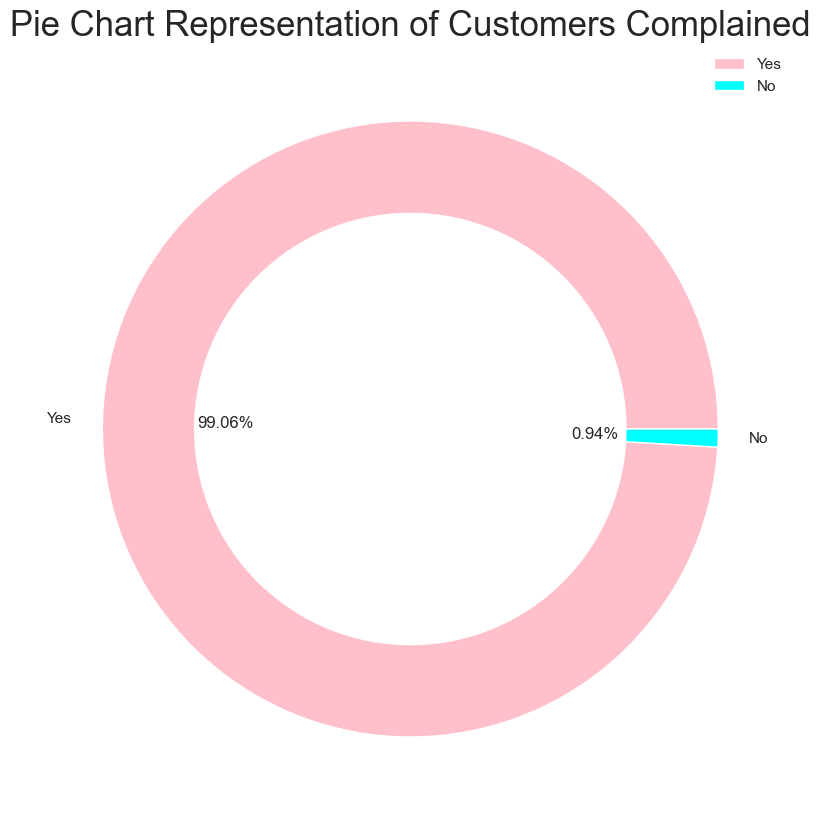

In [91]:
size = [2219, 21]
colors = ['pink', 'cyan']
labels = "Yes", "No", 

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Customers Complained', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()